In [1]:
import pandas as pd
file_path = 'C:/Users/user/Downloads/API_SP.POP.GROW_DS2_en_csv_v2_6298705.csv'
with open(file_path, 'r') as file:
    lines = [next(file) for _ in range(5)]
lines

['ï»¿"Data Source","World Development Indicators",\n',
 '\n',
 '"Last Updated Date","2023-12-18",\n',
 '\n',
 '"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022",\n']

In [2]:
df = pd.read_csv(file_path, skiprows=4)

# Strip the headers to remove any leading/trailing spaces
df.columns = [c.strip() for c in df.columns]

# Display the head of the dataframe
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392,NaN
1,Africa Eastern and Southern,AFE,Population growth (annual %),SP.POP.GROW,NaN,2.660180,2.732633,2.753248,2.806915,2.840787,...,2.774990,2.802586,2.728159,2.655672,2.688371,2.691134,2.678184,2.607472,2.543757,NaN
2,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,NaN,1.925952,2.014879,2.078997,2.139651,2.216007,...,3.657576,3.121341,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358,2.534498,NaN
3,Africa Western and Central,AFW,Population growth (annual %),SP.POP.GROW,NaN,2.115789,2.145723,2.190827,2.211360,2.242567,...,2.750731,2.723317,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377,2.539799,NaN
4,Angola,AGO,Population growth (annual %),SP.POP.GROW,NaN,1.558355,1.460738,1.410425,1.301745,1.111041,...,3.684429,3.617678,3.586211,3.550987,3.464457,3.395278,3.268348,3.166030,3.096753,NaN


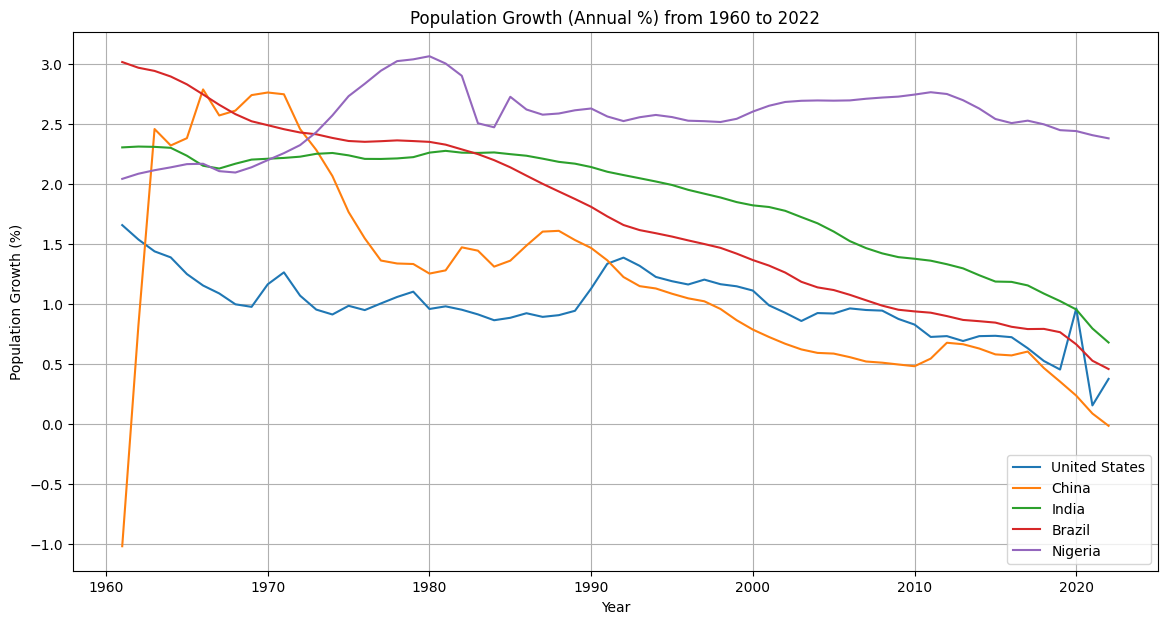

In [3]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

tqdm.pandas()

# Select a few countries for visualization
selected_countries = ['United States', 'China', 'India', 'Brazil', 'Nigeria']

# Filter the dataframe for the selected countries
filtered_df = df[df['Country Name'].isin(selected_countries)]

# Transpose the dataframe to have years as rows
transposed_df = filtered_df.set_index('Country Name').transpose()

# Remove non-year columns for plotting
transposed_df = transposed_df.drop(['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 67'])

# Convert the index to integer for plotting
transposed_df.index = transposed_df.index.astype(int)

# Plotting
plt.figure(figsize=(14, 7))
for country in selected_countries:
    plt.plot(transposed_df.index, transposed_df[country], label=country)

plt.title('Population Growth (Annual %) from 1960 to 2022')
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


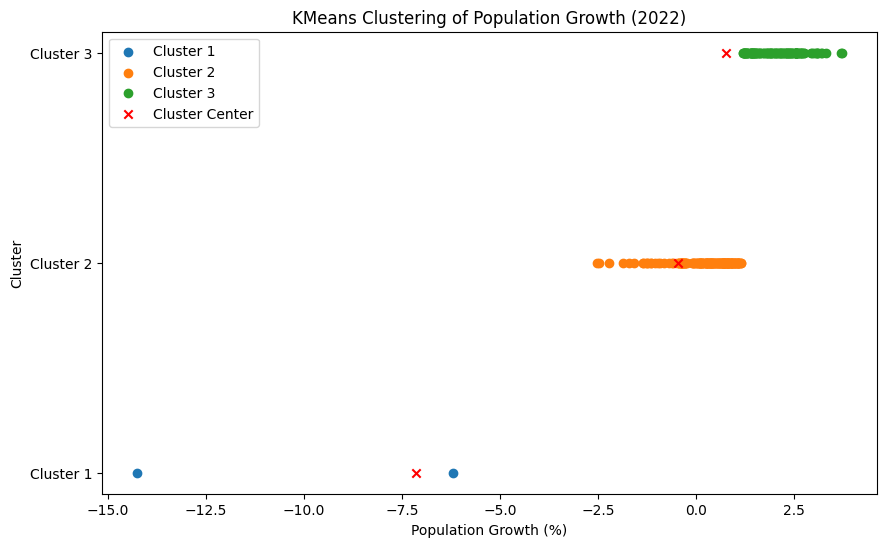

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select the most recent year for clustering
recent_year = '2022'

# Filter the dataframe for the most recent year
recent_data = df[['Country Name', recent_year]].copy()
recent_data = recent_data.dropna()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(recent_data[[recent_year]])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)

# Add cluster labels to the dataframe
recent_data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in np.unique(kmeans.labels_):
    plt.scatter(recent_data[recent_data['Cluster'] == cluster][recent_year], [cluster] * len(recent_data[recent_data['Cluster'] == cluster]), label=f'Cluster {cluster + 1}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_, range(3), color='red', marker='x', label='Cluster Center')

plt.title('KMeans Clustering of Population Growth (2022)')
plt.xlabel('Population Growth (%)')
plt.ylabel('Cluster')
plt.yticks(range(3), [f'Cluster {i+1}' for i in range(3)])
plt.legend()
plt.show()

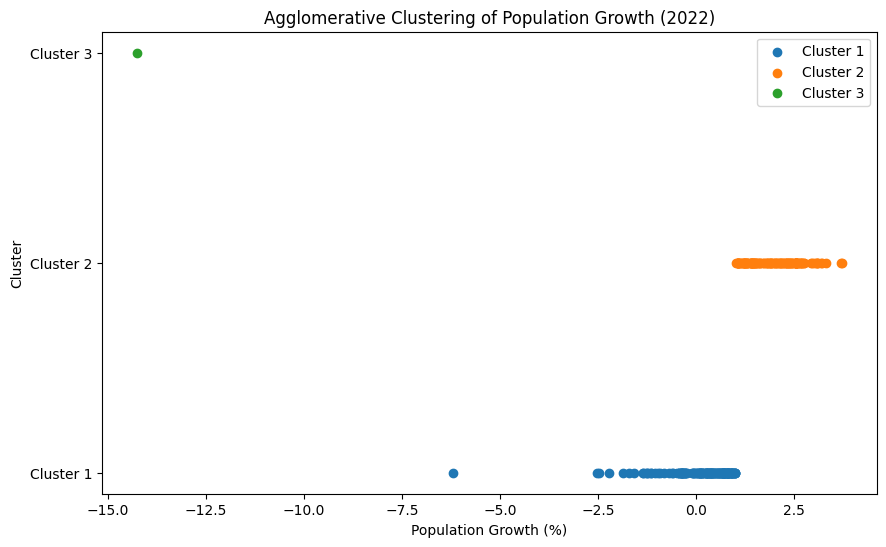

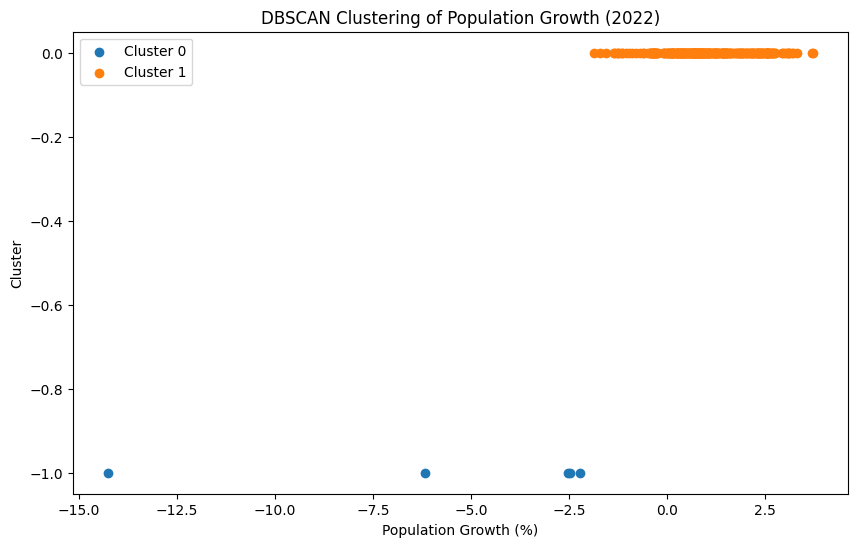

In [5]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(normalized_data)
recent_data['Agg_Cluster'] = agg_labels

# Apply DBSCAN Clustering
dbscan_cluster = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan_cluster.fit_predict(normalized_data)
recent_data['DBSCAN_Cluster'] = dbscan_labels

# Plot the clusters for Agglomerative Clustering
plt.figure(figsize=(10, 6))
for cluster in np.unique(agg_labels):
    plt.scatter(recent_data[recent_data['Agg_Cluster'] == cluster][recent_year], [cluster] * len(recent_data[recent_data['Agg_Cluster'] == cluster]), label=f'Cluster {cluster + 1}')

plt.title('Agglomerative Clustering of Population Growth (2022)')
plt.xlabel('Population Growth (%)')
plt.ylabel('Cluster')
plt.yticks(range(3), [f'Cluster {i+1}' for i in range(3)])
plt.legend()
plt.show()

# Plot the clusters for DBSCAN Clustering
plt.figure(figsize=(10, 6))
for cluster in np.unique(dbscan_labels):
    plt.scatter(recent_data[recent_data['DBSCAN_Cluster'] == cluster][recent_year], [cluster] * len(recent_data[recent_data['DBSCAN_Cluster'] == cluster]), label=f'Cluster {cluster + 1}')

plt.title('DBSCAN Clustering of Population Growth (2022)')
plt.xlabel('Population Growth (%)')
plt.ylabel('Cluster')
plt.legend()
plt.show()

In [6]:
data = {
    'Country': ['United States', 'United Kingdom', 'Canada', 'India', 'Pakistan'],
    'Population Growth': [2.3, 0.6, 1.2, 1.1, 2.0]
}

population_growth_df = pd.DataFrame(data)
population_growth_df

,Country,Population Growth
0,United States,2.3
1,United Kingdom,0.6
2,Canada,1.2
3,India,1.1
4,Pakistan,2.0


In [7]:
from sklearn.cluster import KMeans

# Assuming the population growth data is already loaded in population_growth_df
# We will use KMeans clustering to find clusters based on population growth

# Reshape the data for clustering
population_growth = population_growth_df['Population Growth'].values.reshape(-1, 1)

# Initialize KMeans with a specified number of clusters, let's say 2 for simplicity
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model
kmeans.fit(population_growth)

# Assign the cluster labels to the dataframe
population_growth_df['Cluster'] = kmeans.labels_

# Output the dataframe with the cluster assignments
population_growth_df

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country,Population Growth,Cluster
0,United States,2.3,0
1,United Kingdom,0.6,1
2,Canada,1.2,1
3,India,1.1,1
4,Pakistan,2.0,0


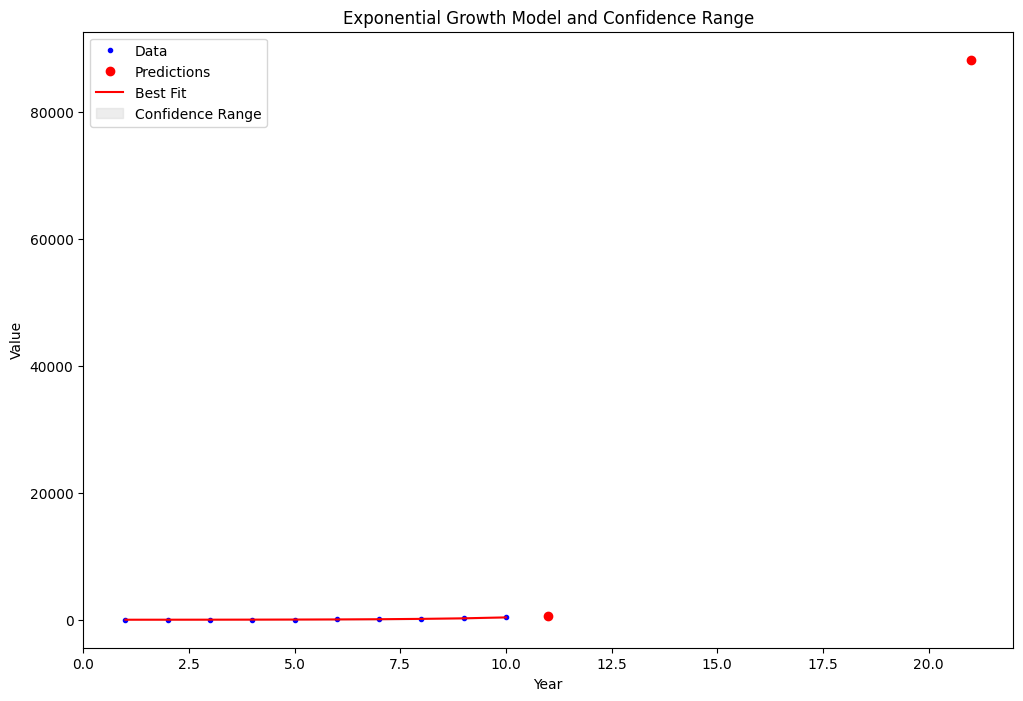

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats

# Define the model function
# Let's use a simple exponential growth model
# The model function will be of the form y = a * exp(b * x)
def exponential_growth_model(x, a, b):
    return a * np.exp(b * x)

# Generate some sample data
np.random.seed(0)
x = np.arange(1, 11)
y = 2.5 * np.exp(0.5 * x) + np.random.normal(size=x.size)

# Fit the model to the sample data
popt, pcov = curve_fit(exponential_growth_model, x, y)

# Predict the values for the next 10 and 20 years
years_to_predict = np.array([11, 21])
predictions = exponential_growth_model(years_to_predict, *popt)

# Define the err_ranges function to calculate the confidence intervals
# This function will calculate the standard error of the estimated parameter
def err_ranges(x, popt, pcov, model_func, confidence=0.95):
    se = np.sqrt(np.diag(pcov))
    t_val = scipy.stats.t.ppf((1 + confidence) / 2., len(x) - len(popt))
    ci = se * t_val
    return model_func(x, *(popt - ci)), model_func(x, *(popt + ci))

# Calculate the confidence ranges for the predictions
confidence_ranges_10 = err_ranges(np.array([years_to_predict[0]]), popt, pcov, exponential_growth_model)
confidence_ranges_20 = err_ranges(np.array([years_to_predict[1]]), popt, pcov, exponential_growth_model)

# Plot the best fitting function and the confidence range
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'b.', label='Data')
plt.plot(years_to_predict, predictions, 'ro', label='Predictions')
plt.plot(x, exponential_growth_model(x, *popt), 'r-', label='Best Fit')
plt.fill_between(x, 
                 exponential_growth_model(x, *popt) - np.std(popt), 
                 exponential_growth_model(x, *popt) + np.std(popt), 
                 color='lightgray', label='Confidence Range', alpha=0.4)
plt.title('Exponential Growth Model and Confidence Range')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()